In [1]:
import pandas as pd
import numpy as np

In [2]:
my_file= pd.read_csv('Food_inspection.csv')

# step 1.1

# table with unique values of category

In [3]:
my_file.drop_duplicates(subset='Category')

,Establishment ID,Name,Address 1,Address 2,City,Zip,Inspection Date,Inspection Results,Food from Approved Source (C),Food Protected from Contamination (C),...,Nutritional Labeling,Trans Fat Ban,No-Smoking Sign Posted,Inspection Type,Owner,Category,Type,Latitude,Longitude,Location
0,18628,SUBWAY #22916,12193 DARNESTOWN RD.,NaN,GAITHERSBURG,20878,12/19/2018,No Critical Violations Noted,In Compliance,In Compliance,...,Not applicable,In Compliance,In Compliance,Monitoring,"P. N. ENTERPRISES, LLC",Restaurant,Food,39.1179,-77.2524,"(39.1179, -77.2524)"
1,1059,GIANT FOOD #0192,18250 FLOWER HILL WAY,NaN,GAITHERSBURG,20879,12/19/2018,Critical Violations Corrected,In Compliance,In Compliance,...,Not applicable,In Compliance,In Compliance,Comprehensive,"GIANT OF MARYLAND, LLC",Market,Food,39.1551,-77.1659,"(39.1551, -77.1659)"
13,19393,NATRAJ RESTAURANT CATERER,403 E. DIAMOND AVE,NaN,GAITHERSBURG,20877,12/18/2018,Critical Violations Corrected,In Compliance,Out of Compliance,...,Not applicable,In Compliance,In Compliance,Comprehensive,JANAKARORA ASHWANIRORA,Caterer,Food,39.1419,-77.1904,"(39.1419, -77.1904)"
18,28847,WHEATON VOLUNTEER RESCUE SQUAD,2400 ARCOLA AVE,NaN,SILVER SPRING,20902,12/12/2017,No Critical Violations Noted,In Compliance,In Compliance,...,Not applicable,In Compliance,In Compliance,Environmental,WHEATON VOL RESCUE SQUAD,Non-Profit,Food,39.0467,-77.0515,"(39.0467, -77.0515)"
23,28818,MCPS FOOD SERVICES TEST/CATERING KITCHEN,8401 TURKEY THICKET DR,NaN,GAITHERSBURG,20879,12/12/2017,No Critical Violations Noted,In Compliance,In Compliance,...,Not applicable,In Compliance,In Compliance,Monitoring,MCPS,Public School- Other,Food,39.1752,-77.1731,"(39.1752, -77.1731)"
27,20923,DELICIOUS GOURMET,7840 BEECHCRAFT AVE.,NaN,GAITHERSBURG,20879,12/19/2018,Critical Violations Corrected,In Compliance,In Compliance,...,Not applicable,In Compliance,In Compliance,Comprehensive,MAHMOUD ABUL HAWA,NaN,Food,39.1621,-77.1616,"(39.1621, -77.1616)"
28,386,BURNT MILLS ELEMENTARY,11211 CHILDS ST.,NaN,SILVER SPRING,20901,12/17/2018,Critical Violations Corrected,In Compliance,In Compliance,...,Not applicable,In Compliance,In Compliance,Comprehensive,MONTGOMERY COUNTY PUBLIC SCHOOLS,Public School- Elementary,Food,39.0394,-77.0013,"(39.0394, -77.0013)"
33,1691,MEDSTAR MONTGOMERY MEDICAL CENTER-HOSP,18101 PRINCE PHILIP DR.,NaN,OLNEY,20832,12/13/2017,Critical Violations Corrected,In Compliance,In Compliance,...,Not applicable,In Compliance,In Compliance,Comprehensive,"SODEXO MANAGEMENT, INC.",Hospital,Food,39.1539,-77.0540,"(39.1539, -77.054)"
36,594,COL. E. BROOKE LEE MIDDLE,11800 MONTICELLO AVE.,NaN,SILVER SPRING,20902,12/14/2018,No Critical Violations Noted,In Compliance,In Compliance,...,Not applicable,In Compliance,In Compliance,Comprehensive,MONTGOMERY COUNTY PUBLIC SCHOOLS,Public School- Middle,Food,39.0496,-77.0306,"(39.0496, -77.0306)"
37,28350,MONTGOMERY ADULT DAY CARE,9123 GAITHER RD,NaN,GAITHERSBURG,20879,12/18/2018,No Critical Violations Noted,In Compliance,In Compliance,...,Not applicable,In Compliance,In Compliance,Monitoring,MONTGOMERY ADULT DAY CARE INC,Assisted Living,Food,39.1180,-77.1879,"(39.118, -77.1879)"


# Category column values that represent a restaurant are -
Restaurant - Subway

Private School - Castle Laser Tag Cafe

Carry Out - Bethesda Bagels

Snack Bar - Dogwood Snack Bar

# single dummy variable based on above subjective response

In [4]:
self_cat_array=np.array(my_file['Category'])
single_dummy=[]
for elem in self_cat_array:
    if elem== 'Restaurant' or elem=='Private School' or elem=='Carry Out' or elem=='Snack Bar':
        single_dummy.append(1)
    else:
        single_dummy.append(0)
my_file['single_dummy_for_visualization']=single_dummy

In [5]:
#demo
my_file[my_file['Name'].str.contains('SUBWAY')]['Category']

0        Restaurant
10       Restaurant
41       Restaurant
43       Restaurant
75       Restaurant
127      Restaurant
156      Restaurant
183      Restaurant
228      Restaurant
317      Restaurant
328      Restaurant
330             NaN
352      Restaurant
365      Restaurant
373      Restaurant
405             NaN
415      Restaurant
457      Restaurant
484      Restaurant
639      Restaurant
643             NaN
829      Restaurant
870      Restaurant
916      Restaurant
931          Market
981      Restaurant
1032     Restaurant
1049     Restaurant
1103     Restaurant
1270     Restaurant
            ...    
11723    Restaurant
11774    Restaurant
11788    Restaurant
11821    Restaurant
11857           NaN
11867    Restaurant
11875    Restaurant
11889    Restaurant
11895    Restaurant
12075    Restaurant
12099    Restaurant
12213    Restaurant
12287    Restaurant
12359    Restaurant
12415        Market
12433    Restaurant
12471    Restaurant
12515    Restaurant
12545    Restaurant


# step 1.2
adding three new columns and converting one from object dtype to datetime

In [6]:
my_file['new_year_col'] = my_file['Inspection Date'].str[6:]
my_file['new_month_col'] = my_file['Inspection Date'].str[:2]
my_file['new_year_month_col']= my_file['Inspection Date'].str[6:] + '/' + my_file['Inspection Date'].str[:2]
my_file['Inspection Date'] = pd.to_datetime(my_file['Inspection Date'])

# as you can see below , Inspection Date column has been converted

In [7]:
my_file.dtypes

Establishment ID                                    int64
Name                                               object
Address 1                                          object
Address 2                                          object
City                                               object
Zip                                                 int64
Inspection Date                            datetime64[ns]
Inspection Results                                 object
Food from Approved Source (C)                      object
Food Protected from Contamination (C)              object
Ill Workers Restricted (C)                         object
Proper Hand Washing (C)                            object
Cooling Time and Temperature (C)                   object
Cold Holding Temperature (C)                       object
Hot Holding Temperature (C)                        object
Cooking Time and Temperature (C)                   object
Reheating Time and Temperature (C)                 object
Hot and Cold R

# Step 1.3

In [8]:
my_file.columns

Index(['Establishment ID', 'Name', 'Address 1', 'Address 2', 'City', 'Zip',
       'Inspection Date', 'Inspection Results',
       'Food from Approved Source (C)',
       'Food Protected from Contamination (C)', 'Ill Workers Restricted (C)',
       'Proper Hand Washing (C)', 'Cooling Time and Temperature (C)',
       'Cold Holding Temperature (C)', 'Hot Holding Temperature (C)',
       'Cooking Time and Temperature (C)',
       'Reheating Time and Temperature (C)',
       'Hot and Cold Running Water Provided (C)', 'Proper Sewage Disposal (C)',
       'Toxic Substances & Pesticides', 'Rodent and Insects',
       'Nutritional Labeling', 'Trans Fat Ban', 'No-Smoking Sign Posted',
       'Inspection Type', 'Owner', 'Category', 'Type', 'Latitude', 'Longitude',
       'Location', 'single_dummy_for_visualization', 'new_year_col',
       'new_month_col', 'new_year_month_col'],
      dtype='object')

# dummy variable column made for each column with type of compliance with following function and command in next block

In [9]:
def my_func(column_name_str):
    np_array = np.array(my_file[column_name_str])
    count=0
    dummy_array=[]

    for elem in np_array:
        if elem=='In Compliance':
            dummy_array.append(1)

        elif elem== 'Out of Compliance':
            dummy_array.append(0) 

        else:
            dummy_array.append(np.nan)

    my_file[column_name_str+'_dummy']=dummy_array
    

In [10]:
for i in my_file.columns[8:24]:
    my_func(i)

# all dummy variable columns added to dataframe as you can see below

In [11]:
my_file.columns

Index(['Establishment ID', 'Name', 'Address 1', 'Address 2', 'City', 'Zip',
       'Inspection Date', 'Inspection Results',
       'Food from Approved Source (C)',
       'Food Protected from Contamination (C)', 'Ill Workers Restricted (C)',
       'Proper Hand Washing (C)', 'Cooling Time and Temperature (C)',
       'Cold Holding Temperature (C)', 'Hot Holding Temperature (C)',
       'Cooking Time and Temperature (C)',
       'Reheating Time and Temperature (C)',
       'Hot and Cold Running Water Provided (C)', 'Proper Sewage Disposal (C)',
       'Toxic Substances & Pesticides', 'Rodent and Insects',
       'Nutritional Labeling', 'Trans Fat Ban', 'No-Smoking Sign Posted',
       'Inspection Type', 'Owner', 'Category', 'Type', 'Latitude', 'Longitude',
       'Location', 'single_dummy_for_visualization', 'new_year_col',
       'new_month_col', 'new_year_month_col',
       'Food from Approved Source (C)_dummy',
       'Food Protected from Contamination (C)_dummy',
       'Ill Workers

# displaying just dummy variable columns as asked 

In [12]:
my_file=my_file.drop(['Nutritional Labeling_dummy'],axis=1)
my_file[my_file.columns[35:]]    

,Food from Approved Source (C)_dummy,Food Protected from Contamination (C)_dummy,Ill Workers Restricted (C)_dummy,Proper Hand Washing (C)_dummy,Cooling Time and Temperature (C)_dummy,Cold Holding Temperature (C)_dummy,Hot Holding Temperature (C)_dummy,Cooking Time and Temperature (C)_dummy,Reheating Time and Temperature (C)_dummy,Hot and Cold Running Water Provided (C)_dummy,Proper Sewage Disposal (C)_dummy,Toxic Substances & Pesticides_dummy,Rodent and Insects_dummy,Trans Fat Ban_dummy,No-Smoking Sign Posted_dummy
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,1,1,1,0,0,0,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1
5,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1
6,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1
7,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1
8,1,1,1,1,1,0,1,1,1,1,1,1,0,1,1
9,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


# Step 1.4
# to check number of violations

In [13]:
violation_array=[]
for i in range(0,13701):
    row_data=my_file.iloc[i:i+1,35:]
    row_data=pd.DataFrame(data=row_data)
    count=0
    col_name_list=list(row_data.columns)
    for i in range(0,15):
        string=col_name_list[i]
        if int(row_data[string])==int(0):
            count+=1
    
    violation_array.append(count)  

In [14]:
new_col_array=np.array(violation_array)

In [15]:
my_file['no_of_violations']=new_col_array

# dummy variable 1 when out of compliance

In [16]:
dummy_v_array=[]
for number in new_col_array:
    if number > 0 :
        dummy_v_array.append(1)
    else:
        dummy_v_array.append(0)
        
np_dummy_v_array= np.array(dummy_v_array)       

In [17]:
my_file['no_of_violations_dummy']=np_dummy_v_array
step_3_df=my_file

# Step 1.5

In [18]:
dupe_df= my_file[my_file.duplicated(['Establishment ID'])== True]

In [19]:
dupe_df=dupe_df.sort_values(by=['Establishment ID','Inspection Date'])
dupe_df[['Establishment ID','Category','Inspection Date','no_of_violations']]
#dupe_df['Inspection Date'].dtype

,Establishment ID,Category,Inspection Date,no_of_violations
12133,11,Market,2017-11-08,2
89,11,Market,2018-12-21,0
1857,12,Market,2018-01-23,0
8918,12,Market,2018-07-13,1
11248,21,Market,2017-10-17,1
11083,26,Market,2017-10-11,2
13678,28,Market,2017-10-05,0
13652,28,Market,2018-02-26,0
13661,28,Market,2018-04-13,0
6703,28,Market,2019-06-18,1


# consistency in category column

In [20]:
unique_ID_array=dupe_df['Establishment ID'].unique()

# code to drop columns with inconsistency

In [21]:
for ids in unique_ID_array:
    cat_list=dupe_df[dupe_df['Establishment ID']==ids]['Category']
    empty_array=[]
    i=0
    j=0
    for elem in cat_list:
        if i==0:
            empty_array.append(elem)
            i+=1
        else:
            if empty_array[0] == elem :
                continue
            else:
                empty_array.append(elem)
                j+=1
    if j>0:
        drop_value= empty_array[-1]
        temp_dupe_df=dupe_df[dupe_df['Establishment ID']==ids]
        del_dupe_df=temp_dupe_df[temp_dupe_df['Category']==drop_value]
        dupe_df.drop(del_dupe_df.index,inplace=True)
        

# but as is evident from below , number of rows havent reduced and hence no inconsistencies

In [22]:
dupe_df[['Establishment ID','Category','Inspection Date','no_of_violations']]

,Establishment ID,Category,Inspection Date,no_of_violations
12133,11,Market,2017-11-08,2
89,11,Market,2018-12-21,0
1857,12,Market,2018-01-23,0
8918,12,Market,2018-07-13,1
11248,21,Market,2017-10-17,1
11083,26,Market,2017-10-11,2
13678,28,Market,2017-10-05,0
13652,28,Market,2018-02-26,0
13661,28,Market,2018-04-13,0
6703,28,Market,2019-06-18,1


# reshape using Pivot

# Step 2.1

In [23]:
new_df=my_file.iloc[:,35:49]

# columns having violation data

In [24]:
new_col_list=list(new_df.columns)
new_col_list

['Food from Approved Source (C)_dummy',
 'Food Protected from Contamination (C)_dummy',
 'Ill Workers Restricted (C)_dummy',
 'Proper Hand Washing (C)_dummy',
 'Cooling Time and Temperature (C)_dummy',
 'Cold Holding Temperature (C)_dummy',
 'Hot Holding Temperature (C)_dummy',
 'Cooking Time and Temperature (C)_dummy',
 'Reheating Time and Temperature (C)_dummy',
 'Hot and Cold Running Water Provided (C)_dummy',
 'Proper Sewage Disposal (C)_dummy',
 'Toxic Substances & Pesticides_dummy',
 'Rodent and Insects_dummy',
 'Trans Fat Ban_dummy']

In [25]:
count_array=[]
for column in new_col_list:
    new_np_array=np.array(new_df[column])
    count=0
    for number in new_np_array:
        if number==0:
            count+=1
    count_array.append(count)
    

In [26]:
count_array=np.array(count_array)
table = pd.DataFrame(count_array.reshape(-1, len(count_array)),columns=new_col_list)
table=table.rename(index={0:'violations'})

# following table gives count of violations for each violation type

In [27]:
table=table.transpose()
table.sort_values(by=['violations'])

,violations
Ill Workers Restricted (C)_dummy,3
Toxic Substances & Pesticides_dummy,9
Proper Sewage Disposal (C)_dummy,40
Cooking Time and Temperature (C)_dummy,43
Food from Approved Source (C)_dummy,69
Reheating Time and Temperature (C)_dummy,84
Hot and Cold Running Water Provided (C)_dummy,113
Cooling Time and Temperature (C)_dummy,219
Trans Fat Ban_dummy,289
Proper Hand Washing (C)_dummy,524


# most common type of violation is Cold Holding Temperature (C)

# Step 2.2

# making use of dupe_df defined above which has data of establishments with multiple inspections

In [28]:
unique_ID_array   # establishment IDs which has multiple inspections

array([   11,    12,    21, ..., 37257, 37281, 37286])

In [29]:
no_of_inspections=[]   #this will give count of number of inspections for each establishment ID
for ids in unique_ID_array:
    count=len(dupe_df[dupe_df['Establishment ID']==ids])
    no_of_inspections.append(count)

In [30]:
final_inspection=[]    #this is developed for later use when we decide whether establishment gets compliant after inspections or not
for ids in unique_ID_array:
    temp_df=dupe_df[dupe_df['Establishment ID']==ids]
    temp_df=temp_df.sort_values(by=['Inspection Date'])
    last_row=temp_df.iloc[-1,:] #consider last row of subset of dataframe to know about number of violations in most recent inspection
    final_inspection.append(last_row['no_of_violations'])  

In [31]:
compliance_table = pd.DataFrame(columns=['Establishment ID','total_inspection_number','compliant_or_not'])
compliance_table['Establishment ID']=unique_ID_array
compliance_table['total_inspection_number']=no_of_inspections

# Assumption: if most recent inspection shows non-zero number of violations, establishment is never compliant

In [32]:
str_array=[]
for index,number in enumerate(final_inspection): #used enumerate because needed reference to no_of_inspections array while iterating over final_inspection array
    if number==0:
        str_array.append('compliant within {} inspections'.format(no_of_inspections[index]))
    else:
        str_array.append('never compliant')  

In [33]:
compliance_table['compliant_or_not']=str_array

In [34]:
compliance_table.sort_values(by=['total_inspection_number'],ascending=False)

,Establishment ID,total_inspection_number,compliant_or_not
1777,22448,16,never compliant
2185,27834,15,never compliant
737,11211,13,never compliant
1229,18623,10,never compliant
1648,21219,10,compliant within 10 inspections
2061,26878,10,compliant within 10 inspections
2390,28670,9,compliant within 9 inspections
2005,26613,9,never compliant
304,1262,9,compliant within 9 inspections
2636,29568,9,compliant within 9 inspections


# Observations based on table above:
Helps us know about establishments which are 'never compliant'

Establishment IDs can also be known to track down places that need immediate inspection

# Results displayed below can be used as a conclusion for given dataset:

In [35]:
print('number of establishments in dataset not compliant on most recent inspection are {}'.format(len(compliance_table[compliance_table['compliant_or_not']== 'never compliant'])))

number of establishments in dataset not compliant on most recent inspection are 1207


In [36]:
for i in range(1,11):
    print('number of establishments in dataset compliant within {} inspections are {}'.format(i,len(compliance_table[compliance_table['compliant_or_not']== 'compliant within {} inspections'.format(i)])))

number of establishments in dataset compliant within 1 inspections are 633
number of establishments in dataset compliant within 2 inspections are 434
number of establishments in dataset compliant within 3 inspections are 573
number of establishments in dataset compliant within 4 inspections are 290
number of establishments in dataset compliant within 5 inspections are 141
number of establishments in dataset compliant within 6 inspections are 70
number of establishments in dataset compliant within 7 inspections are 26
number of establishments in dataset compliant within 8 inspections are 8
number of establishments in dataset compliant within 9 inspections are 6
number of establishments in dataset compliant within 10 inspections are 2


# End of observations

# EXERCISE 3

# next three blocks are just for my understanding, please dont refer that

In [37]:
id_array=my_file['Establishment ID'].unique()

In [38]:
visualize_array=[]
for each_id in id_array:
    sliced_df=pd.DataFrame()
    cat_array=[]
    sliced_df = my_file[my_file['Establishment ID']== each_id]
    cat_array=sliced_df['Category'].unique()
    if len(cat_array)>1:
        visualize_array.append(each_id)        

In [39]:
visualize_array

[]

# we can conlcude that no establishment ID has multiple category

# start from this point again

In [40]:
import matplotlib.pyplot as plt

# Step 3.1 - bar graph

<function matplotlib.pyplot.show(*args, **kw)>

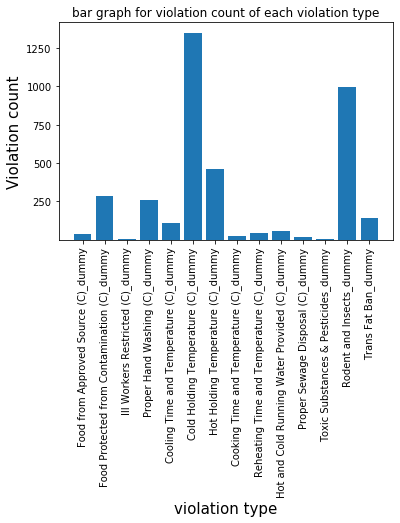

In [41]:
index = np.arange(len(new_col_list))
plt.bar(index,count_array)
plt.xlabel('violation type', fontsize=15)
plt.ylabel('Violation count', fontsize=15)
plt.title('bar graph for violation count of each violation type')
plt.xticks(index, new_col_list, fontsize=10, rotation=90)
plt.yticks([500,1000,1500,2000,2500] , [250,500,750,1000,1250]) 
plt.show

# Step 3.2 - line graph

# using step_3_df which is a copy of original dataframe from step 1.4

In [42]:
step_3_df_use=step_3_df[step_3_df['single_dummy_for_visualization']==1].iloc[:,30:]

In [73]:
month_year_arr=step_3_df_use['new_year_month_col'].unique()
month_year_arr=sorted(month_year_arr) # to store month/year values


In [44]:
x_axis_array=[] # to store percent of restaurant inspections with atleast one violation
for elem in month_year_arr:
    sliced_df=step_3_df_use[step_3_df_use['new_year_month_col']==elem]
    sliced_array=np.array(sliced_df['no_of_violations'])
    count=0
    total_count=0
    for elem in sliced_array:
        if elem>0:
            count=count+1
        total_count+=1
    percent=round(float(count/total_count)*100,2)
    x_axis_array.append(percent)    

In [45]:
x_axis_array

[55.88,
 49.43,
 46.78,
 46.45,
 43.0,
 44.11,
 41.67,
 44.36,
 38.14,
 41.03,
 48.75,
 53.64,
 46.51,
 36.51,
 35.84,
 37.8,
 43.01,
 37.4,
 39.45,
 34.38,
 33.94,
 37.94,
 46.08,
 53.11]

# plot graph based on above two arrays- month_year_arr and x_axis_array

<function matplotlib.pyplot.show(*args, **kw)>

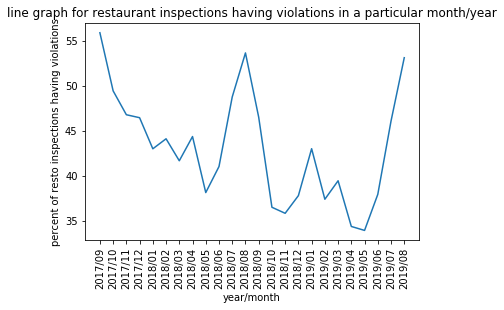

In [46]:
index = np.arange(len(month_year_arr))
plt.plot(month_year_arr,x_axis_array)
plt.xlabel('year/month', fontsize=10)
plt.ylabel('percent of resto inspections having violations', fontsize=10)
plt.title('line graph for restaurant inspections having violations in a particular month/year')
plt.xticks(index, month_year_arr, fontsize=10, rotation=90)
plt.show

# As we can see from above , months towards the latter half of the year have more percent of violations and hence is more strict. 

# months in the first half of the year is when one can say that regulations are not very strict and many restaurants pass the inspections

# highest violations in 2017/09

# lowest violations in 2019/05

# Step 3.3

In [52]:
import plotly.graph_objects as go

In [53]:
mapbox_access_token = 'pk.eyJ1IjoidmF0czU1IiwiYSI6ImNrMnA0eHV1MDAwbDczb252OXd1OHVzaDQifQ.KAGHone2FAfA21Ex1Q_y0g'

In [70]:
step_3_df_viz=step_3_df[step_3_df['single_dummy_for_visualization']==1]
step_3_df_viz_nv=step_3_df_viz[step_3_df_viz['no_of_violations']==0]
step_3_df_viz=step_3_df_viz[step_3_df_viz['no_of_violations']>0]

In [113]:
class_map_data_violation = go.Scattermapbox(
        lon = step_3_df_viz['Longitude'],
        lat = step_3_df_viz['Latitude'],
        text = step_3_df_viz['Establishment ID'].astype(str)+ '<br>' + step_3_df_viz['Name'].astype(str) ,
        hoverinfo='text',
        mode = 'markers',
        marker = dict(
                    color = 'red',
                    symbol = 'circle',
                    opacity = .5
                )
)

class_map_data_no_violation = go.Scattermapbox(
        lon = step_3_df_viz_nv['Longitude'],
        lat = step_3_df_viz_nv['Latitude'],
        text = step_3_df_viz_nv['Establishment ID'].astype(str)+ '<br>' + step_3_df_viz_nv['Name'].astype(str) ,
        hoverinfo='text',
        mode = 'markers',
        marker = dict(
                    color = 'green',
                    symbol = 'circle',
                    opacity = .1
                )
)

class_map_layout = go.Layout(
        title = 'Restaurant Inpection - color red for violations and color green for no violations',
        mapbox=go.layout.Mapbox(
            accesstoken=mapbox_access_token,
            zoom=1
        )
    )

class_map = go.Figure(data=[class_map_data_violation,class_map_data_no_violation], layout=class_map_layout)

In [114]:
from IPython.display import Image
from PIL import Image

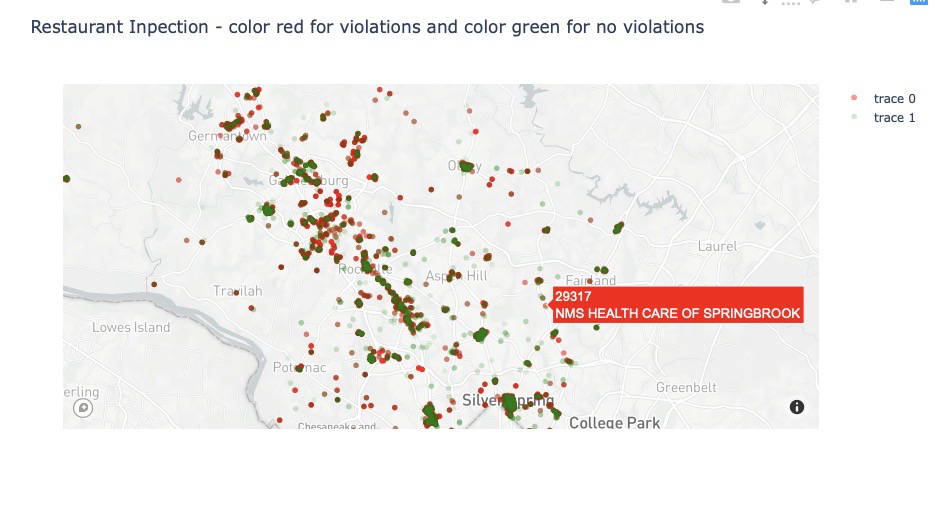

In [115]:
path="/Users/vats/Downloads/HW4_map.JPG"
display(Image.open(path))

# As we can manually inspect data and see that cities like SILVER SPRING, BETHESDA, WHEATON, ROCKVILLE, OLNEY,DAMASCUS have clustering 

# following cells have code for type of violation which has occured for least number of times for each of the above mentioned cities

In [116]:
def my_func(str):
    temp=step_3_df[step_3_df['City']== str]
    temp=temp[temp['no_of_violations']>0]
    temp_sliced=temp.iloc[:,35:49]
    array=[]
    for col in temp_sliced.columns:
        count=0
        for number in temp_sliced[col]:
            if number==0:
                count+=1
        array.append(count)

    req_index=array.index(min(array))
    req_ans=temp_sliced.columns[req_index]
    return req_ans

In [118]:
for string in ['SILVER SPRING','BETHESDA','WHEATON','ROCKVILLE','OLNEY','DAMASCUS']:
    catch=my_func(string)
    print('violation type for least number of times in {} is {}'.format(string, catch))

violation type for least number of times in SILVER SPRING is Ill Workers Restricted (C)_dummy
violation type for least number of times in BETHESDA is Ill Workers Restricted (C)_dummy
violation type for least number of times in WHEATON is Food from Approved Source (C)_dummy
violation type for least number of times in ROCKVILLE is Ill Workers Restricted (C)_dummy
violation type for least number of times in OLNEY is Food from Approved Source (C)_dummy
violation type for least number of times in DAMASCUS is Food from Approved Source (C)_dummy


# have written code for least number of violation type for each city as maximum number of violation type is same for each city- Cold Holding Temperature as stated in Step 2.1

# this is to know whether most of the restuarnts in an area have violations or not

In [119]:
def my_other_func(str):
    temp=step_3_df[step_3_df['City']== str]
    temp_with=temp[temp['no_of_violations']>0]
    temp_without=temp[temp['no_of_violations']==0]
    len_with=len(temp_with['no_of_violations'])
    len_without=len(temp_without['no_of_violations'])
    if len_with > len_without:
        print('number of resto with violations is more compared to resto without violations in area {}'.format(str))
    else:
        print('number of resto with violations is less compared to resto without violations in area {}'.format(str))

In [120]:
for string in ['SILVER SPRING','BETHESDA','WHEATON','ROCKVILLE','OLNEY','DAMASCUS']:
    my_other_func(string)

number of resto with violations is less compared to resto without violations in area SILVER SPRING
number of resto with violations is less compared to resto without violations in area BETHESDA
number of resto with violations is less compared to resto without violations in area WHEATON
number of resto with violations is less compared to resto without violations in area ROCKVILLE
number of resto with violations is less compared to resto without violations in area OLNEY
number of resto with violations is less compared to resto without violations in area DAMASCUS


# END